# Knowledge Extraction

This notebook demonstrates a fine-grained knowledge extraction pipeline to translate complex relations learned within a deep neural network into human-readable rules and insights.

## Packages

In [1]:
import sys
sys.path.append(r"h:\Resume\Projects\DataScience\Banking Telemarketing Decision Support System\Project")


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.data_ingestion import load_csv_to_dataframe

from src.models.model_repository import ModelRepository
from configs.config_repository import ConfigRepository

from src.data_preprocessing import preprocess_pipeline

from src.models.model_utils import evaluate_model_on_test

from src.knowledge_extraction import REMDExtractor

## Load the data

In [2]:
df_train = load_csv_to_dataframe(file_path = '../data//raw/bank-full.csv')
df_test = load_csv_to_dataframe(file_path = '../data/raw/bank.csv' )

Dataset loaded successfully with 45211 rows and 17 columns.
Dataset loaded successfully with 4521 rows and 17 columns.


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df_test['month'].head()

0    oct
1    may
2    apr
3    jun
4    may
Name: month, dtype: object

## Load the pretrained Multi layer preceptron model 

In [5]:
model_repo = ModelRepository()

model_repo.list_registered_models()

[<RegisteredModel: aliases={}, creation_timestamp=1751142514114, description=None, last_updated_timestamp=1751142514139, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1751142514139, current_stage='None', description=None, last_updated_timestamp=1751142514139, name='BankMarketing_SVC', run_id='3b0252d42e0e4f6fa182f01d707cd9c6', run_link=None, source=('file:///h:/Resume/Projects/DataScience/Banking Telemarketing Decision '
  'Support '
  'System/Project/notebooks/../src/models/mlruns/636029484244639439/3b0252d42e0e4f6fa182f01d707cd9c6/artifacts/svm_model'), status='READY', status_message=None, tags={}, user_id=None, version=1>], name='BankMarketing_SVC', tags={}>,
 <RegisteredModel: aliases={}, creation_timestamp=1751092804033, description=None, last_updated_timestamp=1751129527351, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1751129527351, current_stage='None', description=None, last_updated_timestamp=1751129527351, name='LogReg', run_id='f59082006454

In [6]:
MLP_pretrained = model_repo.load_model(registered_name='MLP')
LR_pretrained = model_repo.load_model(registered_name='LogReg')
SVC_pretrained = model_repo.load_model(registered_name='BankMarketing_SVC')
RF_pretrained = model_repo.load_model(registered_name='Random_Forest')

In [7]:
y_test = df_test['y']
X_test = df_test.drop(columns = ['y'])

## Re-evaluation of the models

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


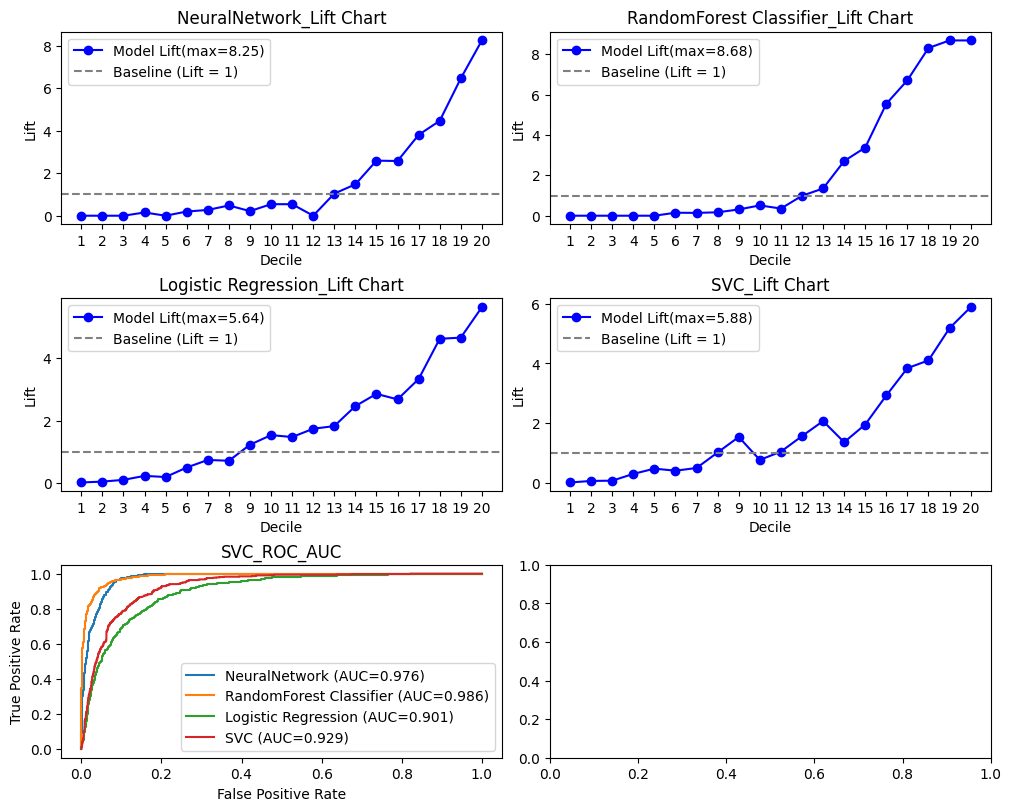

In [9]:
fig_, axes_   = plt.subplots(3, 2, figsize=(10, 8), constrained_layout=True)
axes = axes_.ravel()
test_auc_val, alift = evaluate_model_on_test(estimator=MLP_pretrained, estimator_name="NeuralNetwork", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[0], ax_roc=axes[4])

test_auc_val, alift = evaluate_model_on_test(estimator=RF_pretrained, estimator_name="RandomForest Classifier", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[1], ax_roc=axes[4])

test_auc_val, alift = evaluate_model_on_test(estimator=LR_pretrained, estimator_name="Logistic Regression", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[2], ax_roc=axes[4])

test_auc_val, alift = evaluate_model_on_test(estimator=SVC_pretrained, estimator_name="SVC", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[3], ax_roc=axes[4])

## Feature Importance

******************** Features Importances ********************
num__balance:0.11273898520879082
num__day:0.0335522784568133
num__duration:0.40062843381027896
num__campaign:0.01968383719591816
cat__job_admin.:0.0020254825409146203
cat__job_blue-collar:0.005639495573263853
cat__job_management:0.002869984989688114
cat__job_retired:0.004487621635555661
cat__job_student:0.00366649623967274
cat__job_technician:0.0022950774777561983
cat__marital_married:0.005184987052491365
cat__marital_single:0.005722663746215388
cat__education_primary:0.0024470625949689013
cat__education_secondary:0.0033816292397919356
cat__education_tertiary:0.004719352510998341
cat__housing_no:0.02774107622452378
cat__housing_yes:0.03148852151234928
cat__loan_no:0.008523272795207832
cat__loan_yes:0.006965207490843555
cat__contact_cellular:0.02602411548882546
cat__contact_telephone:0.004417561264022614
cat__contact_unknown:0.03944159706697316
cat__month_apr:0.013282379501542967
cat__month_aug:0.010822774378491632
cat__mont

## Knowledge Extraction

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [122]:
feature_names = df_test.columns.tolist()
feature_names.remove('y')

In [123]:
feature_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [135]:
extractor = REMDExtractor(
    model=mlp_pretrain,
    feature_names=feature_names,
    max_depth=6,
    input_dim=X_test.shape[1]  # only needed if mlp.input is undefined
)

In [136]:
rules = extractor.extract(X_train)

In [137]:

for r in rules:
    print(f"IF {r['if']} THEN class={r['then']}")

IF cat__poutcome_success <= 0.5000 & num__duration <= 3.5144 & num__duration > 1.5899 & cat__poutcome_unknown <= 0.5000 & cat__education_tertiary > 0.5000 & num__day <= -0.2777 THEN class=1
IF cat__poutcome_success <= 0.5000 & num__duration > 3.5144 & cat__education_tertiary <= 0.5000 & num__duration <= 6.7509 & cat__previous_category_0 <= 0.5000 & num__balance > -0.1825 THEN class=1
IF cat__poutcome_success <= 0.5000 & num__duration > 3.5144 & cat__education_tertiary <= 0.5000 & num__duration > 6.7509 & cat__marital_married <= 0.5000 & cat__month_jan <= 0.5000 THEN class=1
IF cat__poutcome_success <= 0.5000 & num__duration > 3.5144 & cat__education_tertiary <= 0.5000 & num__duration > 6.7509 & cat__marital_married > 0.5000 & num__duration > 9.5819 THEN class=1
IF cat__poutcome_success <= 0.5000 & num__duration > 3.5144 & cat__education_tertiary > 0.5000 & num__duration <= 4.1108 & cat__marital_single <= 0.5000 & num__duration <= 3.5581 THEN class=1
IF cat__poutcome_success <= 0.5000 &

In [140]:
# TODO: Remove month and campaign features from the data
# TODO: Integrate the preprocessing step with the model